In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [63]:
## implementar a função que identifica a bandeira
## a função deve receber uma imagem e retornar a bandeira identificada
## a função deve retornar uma lista de tuplas, onde cada tupla contém as coordenadas de um dos cantos da bandeira
## [(PAIS, (x1, y2), (x2, y2)`),(PAIS, (x1, y2), (x2, y2)`),(PAIS, (x1, y2), (x2, y2)`),...]

def calcula_proporcao_cor(hsv_roi, lower, upper):
    """Calcula a proporção de pixels dentro do intervalo de cor."""
    mask = cv2.inRange(hsv_roi, lower, upper)
    total_pixels = hsv_roi.size
    return cv2.countNonZero(mask) / total_pixels

def identifica_bandeira(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


    cores = {
    "red": [(np.array([0, 70, 50]), np.array([10, 255, 255])),
            (np.array([170, 70, 50]), np.array([180, 255, 255]))],
    "white": [(np.array([0, 0, 150]), np.array([180, 30, 255]))],
    "green": [(np.array([35, 50, 50]), np.array([85, 255, 255]))],
    "orange": [(np.array([5, 100, 100]), np.array([35, 255, 255]))]
    }


    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    flags = []

    for contour in contours:
        area = cv2.contourArea(contour)

        if area > 100:
            x, y, w, h = cv2.boundingRect(contour)
            roi = img[y:y+h, x:x+w]
            hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)


            red_prop = sum(calcula_proporcao_cor(hsv_roi, lower, upper) for lower, upper in cores["red"])
            white_prop = sum(calcula_proporcao_cor(hsv_roi, lower, upper) for lower, upper in cores["white"])
            green_prop = sum(calcula_proporcao_cor(hsv_roi, lower, upper) for lower, upper in cores["green"])
            orange_prop = sum(calcula_proporcao_cor(hsv_roi, lower, upper) for lower, upper in cores["orange"])


            print(f"Proporções para (x={x}, y={y}):")
            print(f"Vermelho: {red_prop}, Branco: {white_prop}, Verde: {green_prop}, Laranja: {orange_prop}")


            country = "Não reconhecido"
            conditions = [
                {"condition": red_prop >= 0.16 and white_prop >= 0.16 and green_prop < 0.1 and orange_prop < 0.1 , "pais": "monaco"},

                {"condition": red_prop >= 0.2 and white_prop >= 0.1 and green_prop < 0.1 and orange_prop < 0.1, "pais": "peru"},
                {"condition": red_prop <= 0.16 and white_prop > 0.16 and green_prop < 0.1 and orange_prop < 0.1 , "pais": "singapura"},
                {"condition": green_prop >= 0.1 and white_prop >= 0.1 and orange_prop >= 0.1 and red_prop < 0.1, "pais": "irlanda"},
                {"condition": green_prop >= 0.1 and white_prop >= 0.1 and red_prop >= 0.1 and orange_prop < 0.1, "pais": "italia"}
            ]

            for condition in conditions:
                if condition["condition"]:
                    country = condition["pais"]
                    break


            flags.append((country, (x, y), (x + w, y + h)))

    return flags


In [30]:
## nao alterar essa função
# Função para desenhar as bandeiras identificadas
def draw_bandeiras(lista_bandeiras, bgr):
    try:
        for bandeira in lista_bandeiras:
            cv2.rectangle(bgr, bandeira[1], bandeira[2], (255, 0, 0), 5)
            cv2.putText(bgr, bandeira[0], bandeira[1], cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        return bgr
    except Exception as e:
        return bgr

Proporções para (x=192, y=496):
Vermelho: 0.15766376934492263, Branco: 0.17352837255317646, Verde: 0.0, Laranja: 0.0
Proporções para (x=726, y=163):
Vermelho: 0.16586151368760063, Branco: 0.16586151368760063, Verde: 0.0, Laranja: 0.0
Proporções para (x=118, y=121):
Vermelho: 0.2217852616331704, Branco: 0.10963606735469854, Verde: 0.0, Laranja: 0.0
Proporções para (x=705, y=589):
Vermelho: 0.0, Branco: 0.10862978341375827, Verde: 0.11068716567538249, Laranja: 0.11068716567538249
Proporções para (x=343, y=298):
Vermelho: 0.11069182389937107, Branco: 0.10881569129090715, Verde: 0.11194257897168035, Laranja: 0.0
Proporções para (x=751, y=445):
Vermelho: 0.22264631043256997, Branco: 0.11005452562704471, Verde: 0.0, Laranja: 0.0
Proporções para (x=125, y=261):
Vermelho: 0.15591945966611445, Branco: 0.17331464253854975, Verde: 0.0, Laranja: 0.0
Proporções para (x=767, y=496):
Vermelho: 0.22053231939163498, Branco: 0.10901313515381957, Verde: 0.0, Laranja: 0.0
Proporções para (x=84, y=477):
Ve

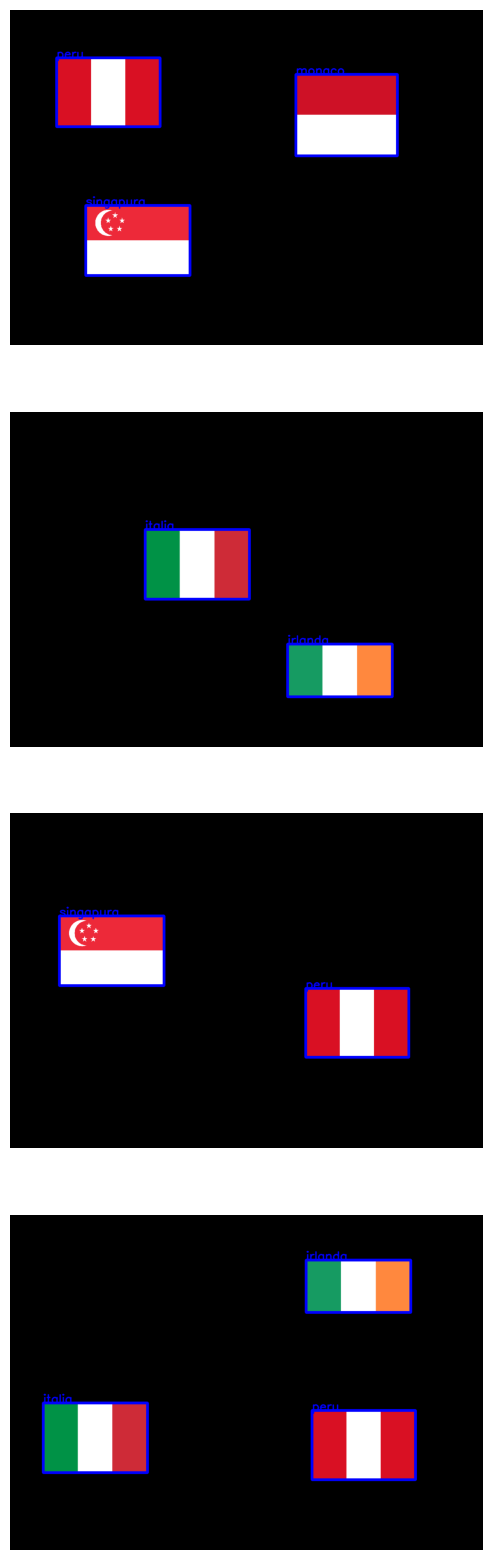

In [69]:
## Para testar a função identifica_bandeira

# Você pode testar a função identifica_bandeira com as imagens de teste fornecidas
#


imgs = [
    cv2.imread('img/teste1.png'),
    cv2.imread('img/teste2.png'),
    cv2.imread('img/teste3.png'),
    cv2.imread('img/teste4.png')
]


fig, axs = plt.subplots(4, 1, figsize=(10, 20))


for i, img in enumerate(imgs):

    resultado = identifica_bandeira(img)


    bgr = draw_bandeiras(resultado, img)


    rgb_img = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)


    axs[i].imshow(rgb_img)
    axs[i].axis('off')


plt.show()

